In [4]:
##Importamos las librerias que utilizaremos
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import sklearn.neighbors as nei
import sklearn.svm as svm
import sklearn.tree as tree
import random as rm
import  pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

In [7]:
#Creamos la curva ROC

n=50.0
rok=[]
roktest=[]

for i in range (int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        rok.append([j,k])
        
X=np.asarray(rok)
Y=[]
for x in rok:
    resp=0
    lens=[1,2,3,4]
    con2=0
    for m in [[2,2],[3,3],[-2,-2],[-3,2]]:
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
        con2=con2+1
    Y.append([resp])
Y=np.asarray(Y)
X=np.asarray(X)

for i in range(int(n)):
    for s in range(int(n)):
        j=rm.random()*8-4
        k=rm.random()*8-4
        roktest.append([j,k])

Xtest=np.asarray(roktest)
Ytest=[]
for x in roktest:
    resp=0
    lens=[1,2,3,4]
    con2=0
    for m in [[2,2],[3,-3],[-2,-2],[-3,2]]:
        con=0
        i=0
        for s in x:
            i=i+(s-m[con])**2
            con=con+1
        if i<=lens[con2]:
            resp=1
            con2=con2+1
    Ytest.append([resp])
Ytest=np.asarray(Ytest)
Xtest=np.asarray(Xtest)

n=100.0
rok=[]
for i in range(int(n)):
    for s in range(int(n)):
        j=(i/n)*8-4
        k=(s/n)*8-4
        rok.append([j,k])
        
Colors=np.asarray(rok)
        
            
                

In [9]:
#Construyendo el comparativo de presicion
accuracies=[]

#Definiendo a la red neuronal
input_size=2
for mid in [9]:
    middle_size=mid
    output_layer_size=1
    #Colocamos placeholders para rescibir los datos para la red
    x = tf.placeholder(tf.float32,[None,input_size]) # los datos de entrada de las variables explicativas
    y_obs = tf.placeholder(tf.float32,[None, output_layer_size]) #Los datos de entrada son definidos pcomo double
    #Ahora declaramos los coeficientes para los cuales se va a entrar el modelo
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size],-1,1),name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size],-1,1),name="W_layer2")
    b_layer1=tf.Variable(tf.zeros([middle_size]),name='b_layer1')
    b_layer2=tf.Variable(tf.zeros([output_layer_size]),name='b_layer2')
    y_est=tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2)
    
    lossfn=tf.reduce_mean(tf.reduce_sum(y_obs-y_est)**2)
    train_step = tf. train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess=tf.Session() #Abriendo la sesion de tensorflow
    sess.run(init)
    for i in range(2000):
        sess.run(init)
    print(sess.run(y_obs,feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1,feed_dict={x:X,y_obs:Y}))
    Colors_y=sess.run(y,feed_dict={x:Colors})
    correct_precition=tf.equal(tf.round(y_est),y_obs)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    accuracies.append(sess.run(accuracy,feed_dict={x:X,y_obs:Y}))
    print("Presicion de la Red Neuronal ")
    print(sess.run(accuracy,feed_dict={x:X,y_obs:Y}))
    print("Presicion de K-vecinos cercanos ")
    knn=nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X,Y)
    print(knn.score(Xtest,Ytest))
    print("Presicion de la Maquina de Soporte Vectoria ")
    scv=smv.SVC()
    svc.fit(X,Y)
    print(svc.score(Xtest,Ytest))
    plt.scatter(Xtest[:,0],Xtest[:,1],c=['red' if i == 1 else 'blue' for i in Ytest],s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y],s=0.015)

InvalidArgumentError: Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_3', defined at:
  File "C:\Users\Eduardo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Eduardo\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-f7d77382416f>", line 11, in <module>
    y_obs = tf.placeholder(tf.float32,[None, output_layer_size]) #Los datos de entrada son definidos pcomo double
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 1530, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1954, in _placeholder
    name=name)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\Eduardo\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Shape [-1,1] has negative dimensions
	 [[Node: Placeholder_3 = Placeholder[dtype=DT_FLOAT, shape=[?,1], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


[[ 0.10529954]]
[[ -0.6987772    2.75048709   8.47799587   3.07540441   5.5828371
   -1.08127487   6.50026846  -6.21787357   2.97562361]
 [  4.76642466  -3.59754729   1.15884435   3.02405071  -3.25050735
    8.33372784  -1.36701131  -3.62031126 -10.60727215]]
Accuracy for NN: 
0.6512
Accuracy for Knn: 
0.6704
Accuracy for Svc: 


C:\Users\Eduardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\Eduardo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6712


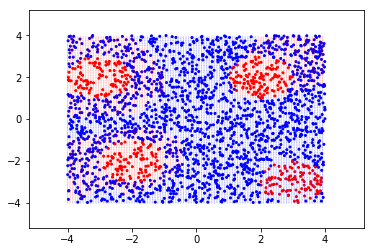

Accuracy for tree with max depth=1
0.6324
Accuracy for tree with max depth=3
0.5984


NameError: name 'display_tree' is not defined

In [10]:
accuracies=[]
input_size=2
for mid in [9]:
    middle_size=mid
    output_layer_size=1
    #Los placeholders son para los datos de entrada
    x = tf.placeholder(tf.float32, [None, input_size])
    y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
    #La variables para lo que se va a ir calculando y modificando en el camino
    W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
    W_layer2=tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
    b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")
    b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")
    y = tf.nn.sigmoid(tf.matmul(tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1),W_layer2)+b_layer2) #la de nuestra
    lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
    #lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
    # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
    init = tf.global_variables_initializer()
    sess = tf.Session() # tipo de sesion, puede ser interactiva
    sess.run(init)
    for i in range(2000):
      sess.run(train_step, feed_dict={x: X, y_: Y})
    #imprimir alguna variable
    print(sess.run(y, feed_dict={x:[[1,0]]}))
    print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
    Colors_y=sess.run(y, feed_dict={x:Colors})
    correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracies.append(sess.run(accuracy, feed_dict={x: X, y_: Y}))
    print("Accuracy for NN: ")
    print(sess.run(accuracy, feed_dict={x: Xtest, y_: Ytest})) # las corremos
    print("Accuracy for Knn: ")
    knn=nei.KNeighborsClassifier(n_neighbors=5)
    knn.fit(X, Y)
    print(knn.score(Xtest,Ytest))
    print("Accuracy for Svc: ")
    svc=svm.SVC()
    svc.fit(X, Y)
    print(svc.score(Xtest,Ytest))    
    plt.scatter(Xtest[:,0],Xtest[:,1],c=['red' if i==1 else 'blue' for i in Ytest], s=4)
    plt.scatter(Colors[:,0],Colors[:,1],c=['red' if np.round(i)==1 else 'blue' for i in Colors_y], s=0.015)
    x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
    plt.ylim([-5.2,5.2])
    plt.xlim([-5.2,5.2])
    plt.show()
    plt.clf()
    sess.close()
    for md in [1,  3, 5, 7, 9, 11]:
        print("Accuracy for tree with max depth="+str(md))
        tre=tree.DecisionTreeClassifier(max_depth=md)
        tre.fit(X, Y)
        print(tre.score(Xtest,Ytest))  
        if md==3:
            display_tree(tre)

In [4]:

def display_tree(tre):
    dot_data = tree.export_graphviz(tre,
                                feature_names=None,
                                out_file=None,
                                filled=True,
                                rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('turquoise', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])
                graph.write_png('Arbol.png')
    img = mpimg.imread('Arbol.png')
    plt.imshow(img, aspect='auto')
    plt.show()

IndentationError: unexpected indent (<ipython-input-4-a04262571f52>, line 21)